<a href="https://colab.research.google.com/github/Sanjana-Kannoorkar/Clustering-with-K-Means/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

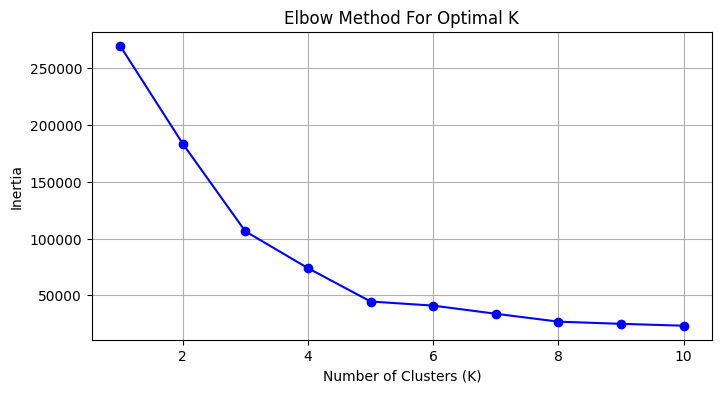

In [6]:
# Elbow Method to determine optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [7]:
# Fit KMeans with chosen number of clusters (e.g., 5)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X)
df['Cluster'] = cluster_labels

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score for K=5: 0.554


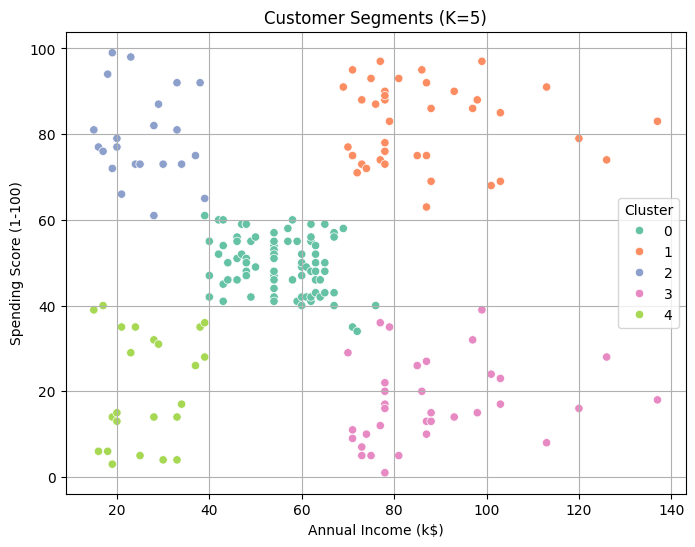

In [8]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()